In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
# !pip install konlpy

   ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
   ---- ----------------------------------- 2.4/19.4 MB 12.3 MB/s eta 0:00:02
   --------- ------------------------------ 4.7/19.4 MB 12.4 MB/s eta 0:00:02
   --------------- ------------------------ 7.3/19.4 MB 11.9 MB/s eta 0:00:02
   ------------------- -------------------- 9.4/19.4 MB 11.5 MB/s eta 0:00:01
   ----------------------- ---------------- 11.5/19.4 MB 11.5 MB/s eta 0:00:01
   ---------------------------- ----------- 13.9/19.4 MB 11.3 MB/s eta 0:00:01
   --------------------------------- ------ 16.5/19.4 MB 11.4 MB/s eta 0:00:01
   -------------------------------------- - 18.9/19.4 MB 11.3 MB/s eta 0:00:01
   ---------------------------------------- 19.4/19.4 MB 11.2 MB/s  0:00:01
   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   -------------------- ------------------- 2.1/4.0 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------- 4.0/4.0 MB 10.9 MB/s  0:00:00

   --

In [2]:
from konlpy.tag import Hannanum

In [4]:
from konlpy.tag import Hannanum

# 1. 찾으신 jvm.dll의 절대 경로를 변수에 담습니다. (r을 꼭 붙이세요)
jvm_path = r'C:\jdk17\bin\server\jvm.dll'

# 2. Hannanum을 초기화할 때 jvmpath를 인자로 직접 넣어줍니다.
# 이렇게 하면 시스템 환경 변수를 뒤지지 않고 바로 이 파일을 실행합니다.
try:
    hannanum = Hannanum(jvmpath=jvm_path)
    print("성공! 형태소 분석 결과:", hannanum.nouns("드디어 해결되었습니다."))
except Exception as e:
    print("여전히 오류가 발생합니다. 에러 내용:", e)

성공! 형태소 분석 결과: ['해결']


In [5]:
hannanum = Hannanum()

In [7]:
f = open('우크라이나.csv', 'r', encoding='cp949')

In [8]:
lines = f.readlines()

In [9]:
f.close()
dataset = []

In [10]:
for i in range(len(lines)):
  dataset.append(hannanum.nouns(re.sub('[^가-힣a-zA-Z\s]','', lines[i])))
dataset[:3]

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\User\AppData\Local\Temp\ipykernel_3884\2461424470.py:2: SyntaxWarning: invalid escape sequence '\s'
  dataset.append(hannanum.nouns(re.sub('[^가-힣a-zA-Z\s]','', lines[i])))


[['파국', '초래', '말'],
 ['코', '시장', '침체', '두나무', '빗썸', '이익', '급감'],
 ['러시아', '자충수', '코앞', '핀란드', '나토', '정식', '회원국']]

In [11]:
dataset[:100]

[['파국', '초래', '말'],
 ['코', '시장', '침체', '두나무', '빗썸', '이익', '급감'],
 ['러시아', '자충수', '코앞', '핀란드', '나토', '정식', '회원국'],
 ['년', '중립국', '핀란드', '나토', '가입', '확정', '마지막', '반대국', '튀르키예', '비준'],
 ['유로존', '월', '소비자물가', '상승', '상승폭', '둔화'],
 ['식량', '등', '제공', '대가', '러', '종', '군수품'],
 ['업황', '안좋아', '이직', '만하네직원', '평균', '연봉', '두나무', '억', '빗썸', '억원'],
 ['광주', '전역', '전시관', '비엔날레', '파빌리온', '관심'],
 ['이', '푸틴', '땅', '후회', '이곳'],
 ['튀르키예', '핀란드', '나토', '가입국'],
 ['러시아북한', '밀착', '가운데', '미국', '기', '체포', '냉전', '뚜렷'],
 ['밀착', '중러', '경제', '주도권', '중국'],
 ['러', '세', '소녀', '부모', '반역자', '낙인'],
 ['월드', 'e브리핑', '일본', '미국', '주', '대중', '반도체', '규제', '동참'],
 ['난방비', '악몽', '여당', '스톱', '전', '가스공사', '방치'],
 ['도요타', '러시아', '상트페테르부르크', '공장', '매각'],
 ['핀란드', '나토', '회원국', '다음주', '합류'],
 ['핀란드', '나토', '가입', '최종관문', '다음주', '합류', '예고'],
 ['에너지', '식품', '유로존', '월', '소비자물가', '상승'],
 ['러시아', '자충수', '접경국', '핀란드', '나토', '가입', '최종', '관문', '통과'],
 ['두나무', '작년', '영업익', '억', '크립토', '윈터', '감소'],
 ['우크라', '전쟁', '의용군', '파견', '추진', '정황'],
 ['우크라이나전

In [12]:
len(dataset)

17941

In [14]:
from apyori import apriori

In [15]:
result = (list(apriori(dataset, min_support=0.01)))

In [21]:
result

[RelationRecord(items=frozenset({'가격'}), support=0.01092469761997659, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'가격'}), confidence=0.01092469761997659, lift=1.0)]),
 RelationRecord(items=frozenset({'가능성'}), support=0.010367315088345132, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'가능성'}), confidence=0.010367315088345132, lift=1.0)]),
 RelationRecord(items=frozenset({'강화'}), support=0.013600133771807592, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'강화'}), confidence=0.013600133771807592, lift=1.0)]),
 RelationRecord(items=frozenset({'것'}), support=0.040688924809096486, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'것'}), confidence=0.040688924809096486, lift=1.0)]),
 RelationRecord(items=frozenset({'경제'}), support=0.01711164372108578, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'경제'}), confidence=0.0

In [22]:
RelationRecord(items=frozenset({'푸틴', '시진핑'}), support=0.011091912379466027, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'푸틴', '시진핑'}), confidence=0.011091912379466027, lift=1.0), OrderedStatistic(items_base=frozenset({'시진핑'}), items_add=frozenset({'푸틴'}), confidence=0.443207126948775, lift=6.469958555401117), OrderedStatistic(items_base=frozenset({'푸틴'}), items_add=frozenset({'시진핑'}), confidence=0.16192026037428806, lift=6.469958555401118)]),

NameError: name 'RelationRecord' is not defined

In [ ]:
# Support (지지도): 0.011 - 두 단어가 함께 나타나는 비율이 약 1.1%
# Confidence (신뢰도):

# '시진핑'이 나올 때 '푸틴'도 나올 확률: 44.3%
# '푸틴'이 나올 때 '시진핑'도 나올 확률: 16.2%


# Lift (향상도): 6.47

In [17]:

df = pd.DataFrame(result)

In [18]:

df.head()

,items,support,ordered_statistics
0,(가격),0.010925,"[((), (가격), 0.01092469761997659, 1.0)]"
1,(가능성),0.010367,"[((), (가능성), 0.010367315088345132, 1.0)]"
2,(강화),0.013600,"[((), (강화), 0.013600133771807592, 1.0)]"
3,(것),0.040689,"[((), (것), 0.040688924809096486, 1.0)]"
4,(경제),0.017112,"[((), (경제), 0.01711164372108578, 1.0)]"


In [19]:
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['length']==2)&(df['support'] >= 0.01)].sort_values(by='support',
                                                               ascending=False)

In [20]:
df.head()

,items,support,ordered_statistics,length
74,"(우크라, 러)",0.034669,"[((), (러, 우크라), 0.03466919346747673, 1.0), ((러...",2
79,"(지원, 우크라)",0.029708,"[((), (우크라, 지원), 0.029708488935956748, 1.0), (...",2
78,"(우크라, 전쟁)",0.028092,"[((), (우크라, 전쟁), 0.02809207959422552, 1.0), ((...",2
80,"(우크라, 푸틴)",0.014102,"[((), (우크라, 푸틴), 0.014101778050275904, 1.0), (...",2
75,"(우크라, 러시아)",0.013377,"[((), (우크라, 러시아), 0.013377180759155009, 1.0), ...",2


In [ ]:
# !pip install scipy
# !pip install pyg-nightly

In [ ]:
import matplotlib.font_manager as fm
from matplotlib.font_manager import FontEntry

# 폰트 경로 찾기
font_path = "C:/Users/user/AppData/Local/Microsoft/Windows/Fonts/NanumGothic.ttf"
# font_path = "C:/Windows/Fonts/MalgunGothic.ttf"
fm.fontManager.addfont(font_path)

In [29]:
import scipy

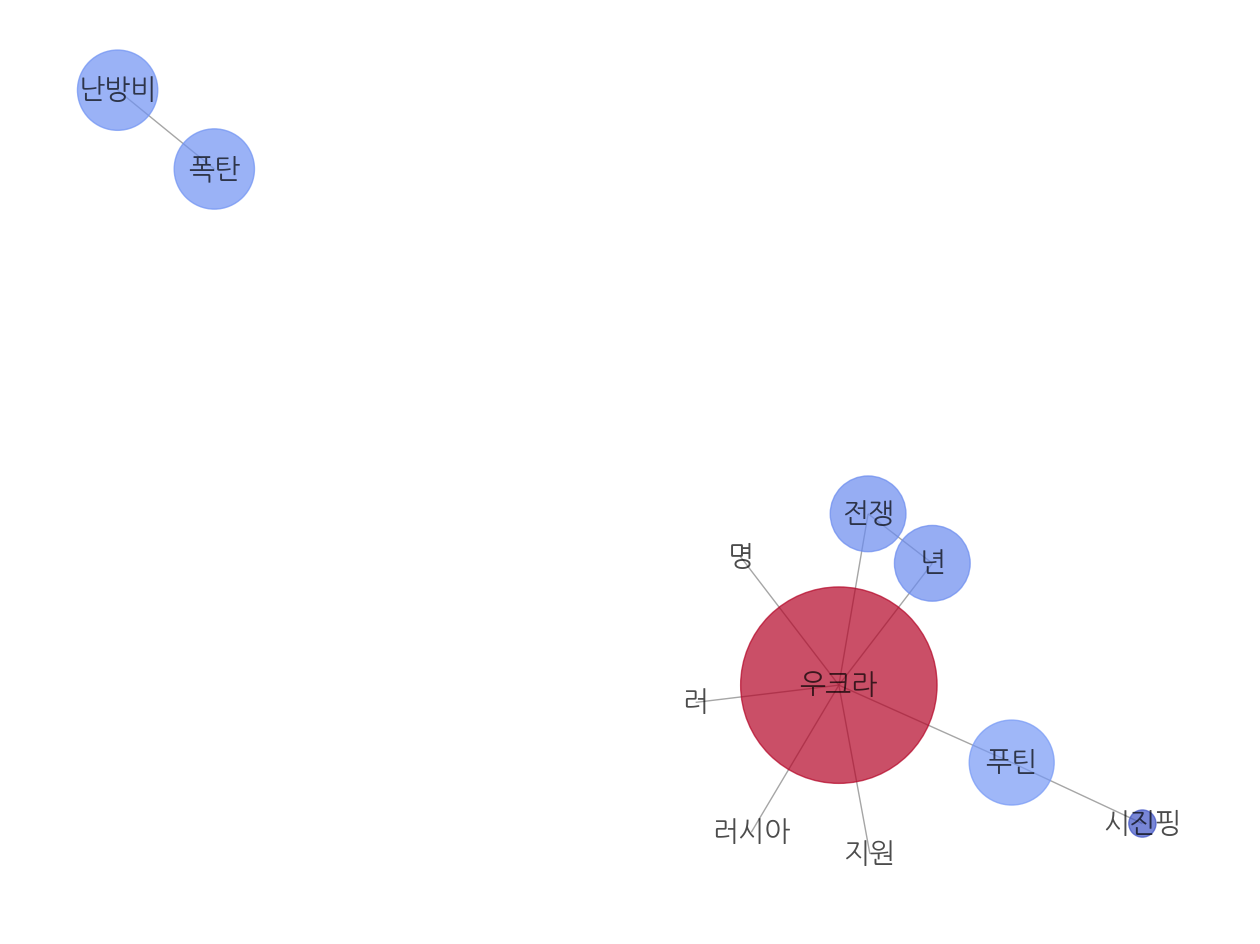

In [35]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000*(nsize-min(nsize)) / (max(nsize)-min(nsize))
pos = nx.spring_layout(G)                       #spring 레이아웃을 사용하기
plt.figure(figsize=(16,12)); plt.axis('off')
nx.draw_networkx(G, font_family='NanumGothic', font_size=20, pos=pos,\
                 node_color=list(pr.values()), node_size=nsize*10, alpha=0.7,\
                 edge_color='.5', cmap=plt.cm.coolwarm)
plt.savefig('네트워크 그래프_우크라이나.png', bbox_inches='tight')

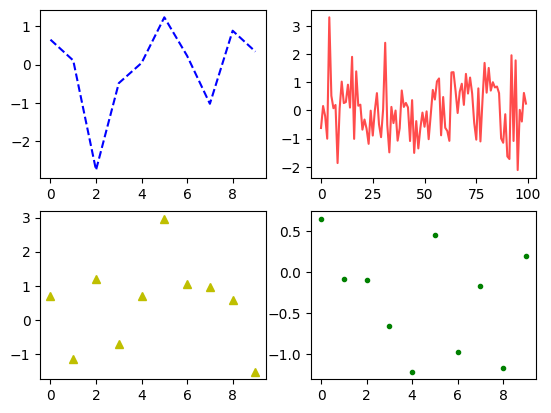

In [36]:
import matplotlib.pyplot as plt
import numpy as np
plt.subplot(2,2 ,1 )
plt.plot(np.random.randn(10), 'b--')
plt.subplot(2,2 ,2 )
plt.plot(np.random.randn(100), 'r', alpha=0.7)
plt.subplot(2,2 ,3 )
plt.plot(np.random.randn(10), 'y^')
plt.subplot(2,2 , 4)
plt.plot(np.random.randn(10), 'g.')
plt.show( )